In [17]:
import subprocess

s = subprocess.check_output("g++ main.cpp LC.cpp LC.h brute_force.cpp brute_force.h dp.cpp dp.h generator.cpp generator.h -o out;./out" , shell = True, cwd='/home/jctuesta/Documents/cppPractice/python/Knapsack_problem/scr/')

a = list(s.decode("utf-8").split())
a = [int(x) for x in a]
size_input = len(a)

In [18]:
#star in 5 and end in n +5 
n = size_input/3
rng = [x for x in range(5, int(n) + 5)]
bf = a[0::3]
dp = a[1::3]
lc = a[2::3]



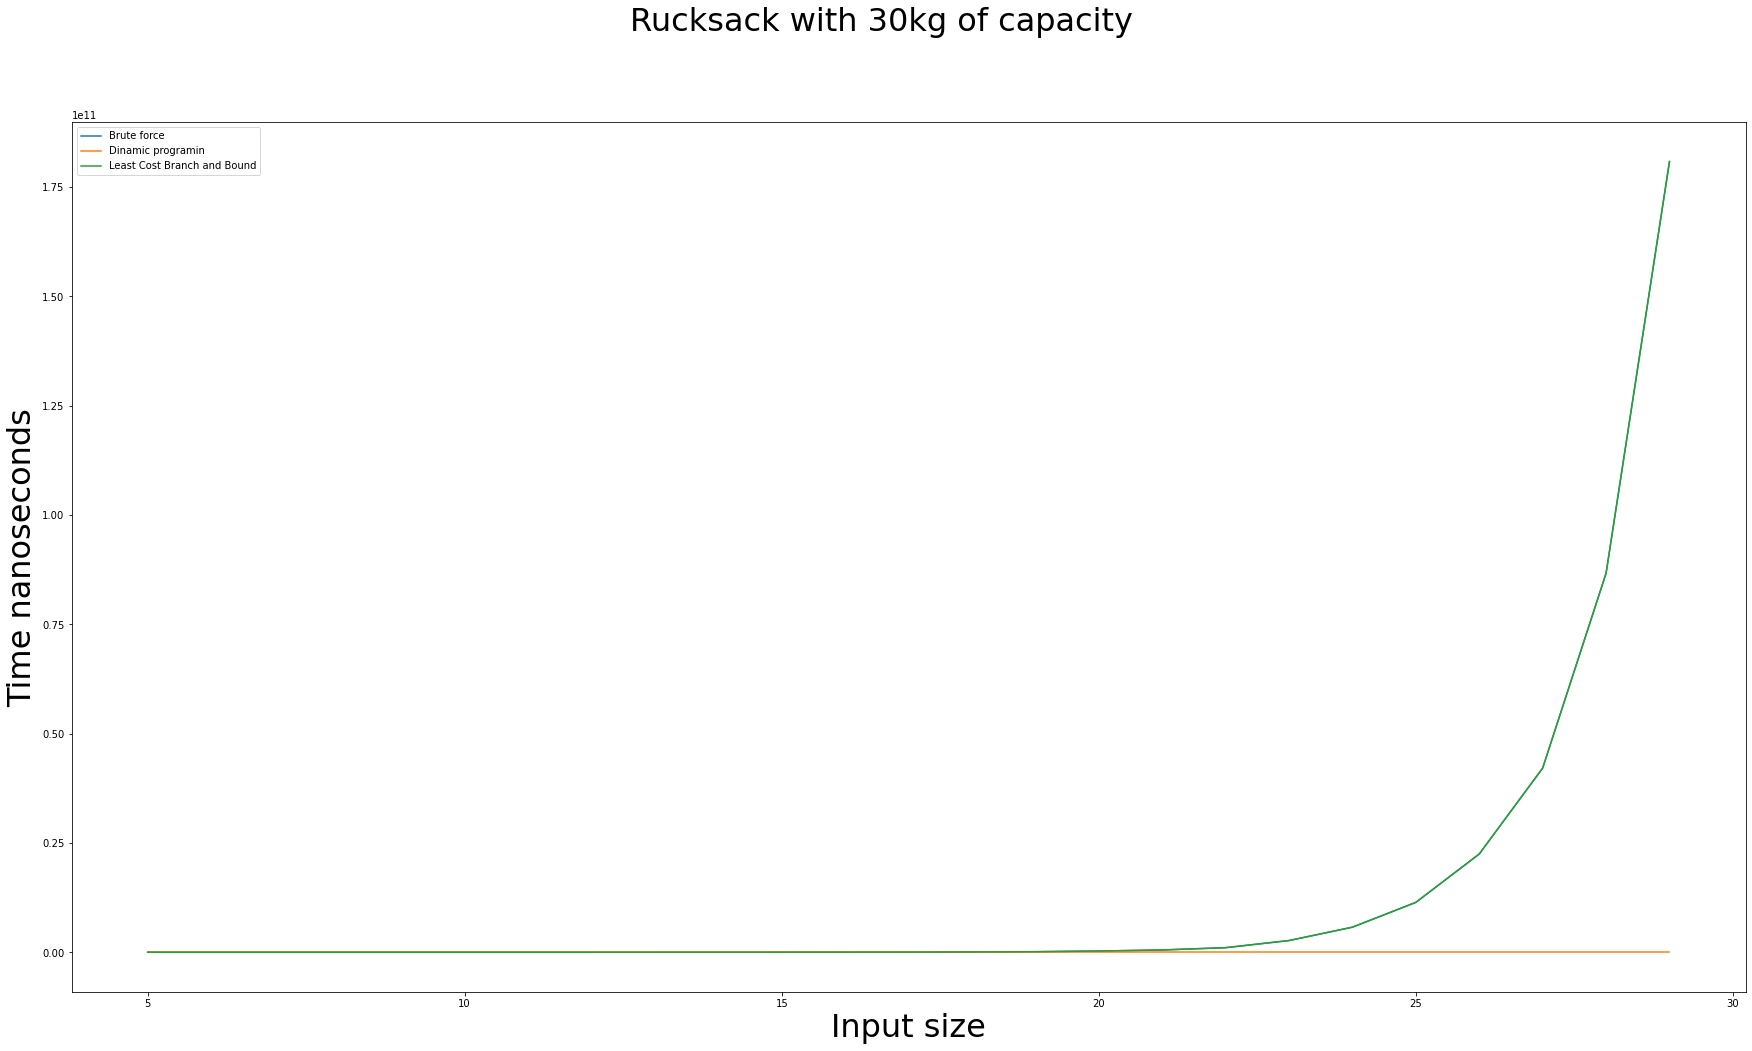

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,16))
plt.plot(rng, bf, label = "Brute force")
plt.plot(rng, dp, label = "Dinamic programin")
plt.plot(rng, lc, label = "Least Cost Branch and Bound")
plt.xlabel('Input size',fontsize=32)
plt.ylabel('Time nanoseconds',fontsize=32)
fig.suptitle('Rucksack with 30kg of capacity', fontsize=32)
plt.legend()

plt.show()



    FIN